# Ejercicio 1
## Enunciado
Genere tres conjuntos de datos de entrenamiento correspondientes al problema de las espirales anidadas de la práctica de python, uno de longitud 150, otro de 600 y un tercero de 3000. Genere un conjunto de test de longitud 10000. A partir de cada uno de los conjuntos de entrenamiento, entrene el árbol de decisión correspondiente y grafique las predicciones sobre el conjunto de test. Comente los resultados.

In [2]:
from Comunes import standardTree
from Generadores import espirales
import numpy as np
import matplotlib.pyplot as plt

In [3]:
testSet = list(espirales(10000)["input"])

sizes = [150, 600, 3000]

trainingSets = []
for sz in sizes:
    trainingSets.append(espirales(sz))

classifiers = []
for i in range(len(trainingSets)):
    classifiers.append(standardTree())


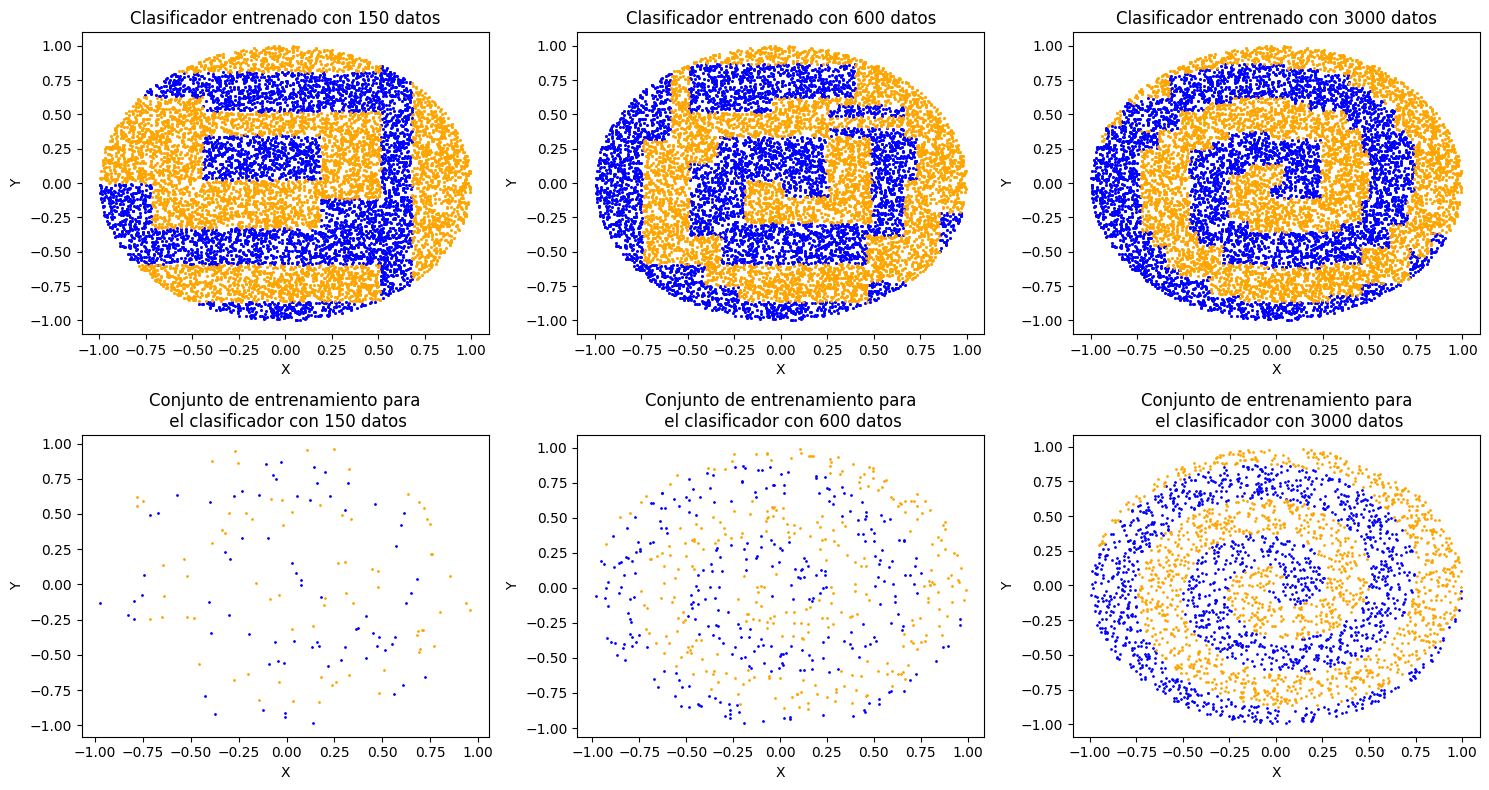

In [21]:
# Entrenamos cada clasificador
for i in range(3):
    classifiers[i].fit(list(trainingSets[i]["input"]), list(trainingSets[i]["output"]))

# Y plotteamos
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()

# Plotteamos las predicciones
for i, trainingSet in enumerate(trainingSets):
   
    # Predecimos sobre el conjunto de testeo
    predict = classifiers[i].predict(testSet)

    # Nos quedamos con las componentes de los clase 0
    x0 = np.array([e[0] for (i,e) in enumerate(testSet) if predict[i] == 0])
    y0 = np.array([e[1] for (i,e) in enumerate(testSet) if predict[i] == 0])

    # Y las componentes de los clase 1
    x1 = np.array([e[0] for (i,e) in enumerate(testSet) if predict[i] == 1])
    y1 = np.array([e[1] for (i,e) in enumerate(testSet) if predict[i] == 1])

    # Y plotteamos en el subplot correspondiente
    axes[i].scatter(x0, y0, color = "blue", s = 1)
    axes[i].scatter(x1, y1, color = "orange", s = 1)

    # Detalles del plot
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].set_title(f'Clasificador entrenado con {sizes[i]} datos')

# Para cada clasificador
for i, clf in enumerate(classifiers):
    
    # Predecimos sobre el conjunto de test
    predicciones = clf.predict(testSet)

    # Convertimos el conjunto de test a un array de numpy para poder filtrar mas facil
    test_array = np.array(testSet)  
    
    # Filtramos sobre el array, aca "predicciones == 0" evalua a un array de true/false con la longitud de predicciones,
    # luego test_array evaluado en ese array devuelve los elementos para los cuales predicciones == 0 es true.
    clase0 = test_array[predicciones == 0]
    clase1 = test_array[predicciones == 1]
    
    # Graficamos, donde clase0[:, 0] son los valores de x (pues nos quedamos con todas las filas pero solo la columna 0) y 
    # clase0[:, 1] son los valores de y.
    axes[i].scatter(clase0[:, 0], clase0[:, 1], color='blue', s=1)
    axes[i].scatter(clase1[:, 0], clase1[:, 1], color='orange', s=1)
    
    # Configurar gráfico
    axes[i].set(xlabel='X', ylabel='Y', 
               title=f'Clasificador entrenado con {sizes[i]} datos')

# Imprimimos los conjuntos de entrenamiento para visualizarlos
for i, trainingSet in enumerate(trainingSets):

    # De los puntos del training set que verifican que su output es 0, quedate con su input y mappeales la proyeccion en x/y
    x0 = trainingSet[trainingSet["output"] == 0]["input"].apply(lambda x: x[0])  
    y0 = trainingSet[trainingSet["output"] == 0]["input"].apply(lambda x: x[1]) 

    # De los puntos del training set que verifican que su output es 1, quedate con su input y mappeales la proyeccion en x/y
    x1 = trainingSet[trainingSet["output"] == 1]["input"].apply(lambda x: x[0]) 
    y1 = trainingSet[trainingSet["output"] == 1]["input"].apply(lambda x: x[1]) 

    # Desplazamos el plot en 3 para plottear debajo del clasificador.
    axes[i + 3].scatter(x0, y0, color="blue", s=1, label="Class 0")
    axes[i + 3].scatter(x1, y1, color="orange", s=1, label="Class 1")

    # Detalles del plot
    axes[i + 3].set_xlabel('X')
    axes[i + 3].set_ylabel('Y')
    axes[i + 3].set_title(f'Conjunto de entrenamiento para\n el clasificador con {sizes[i]} datos')

plt.tight_layout()
plt.show()

### Comentarios sobre los resultados.

Lo primero que podemos concluír es que, claramente, conforme aumenta el tamaño del conjunto de entrenamiento el clasificador obtiene un mejor desempeño sobre el conjunto de prueba. Si observamos las gráficas de los conjuntos de entrenamiento que generamos debajo de las predicciones de cada clasificador, podemos notar que para el caso de 150 datos la figura de la espiral no es reconocible. En ese caso, la muestra tomada no es representativa en absoluto de la población, entonces lo que el clasificador aprende está sobreajustado al conjunto de entrenamiento.

Para el conjunto de 600 datos ya es posible reconocer la forma de las espirales, y esto se refleja en las predicciones de su clasificador asociado sobre el conjunto de test. Finalmente, el conjunto de entrenamiento de 3000 datos es en términos prácticos toda la población, por lo que el clasificador generaliza bien en su entrenamiento y obtiene un buen desempeño en el test.